In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from simulation import *
from source import *
from aux import *

In [2]:
filename = './dl2_gamma-diffuse_testing.h5'

In [3]:
sim = simulation_object(filename)

In [4]:
src = source_object(tobs=60*u.min)

## Spatial Weights

In [5]:
src_disk = source_object(tobs=60*u.min, shape="disk")
src_ring = source_object(tobs=60*u.min, rmin = 0.5)
src_gauss = source_object(tobs=60*u.min, shape="gaussian")

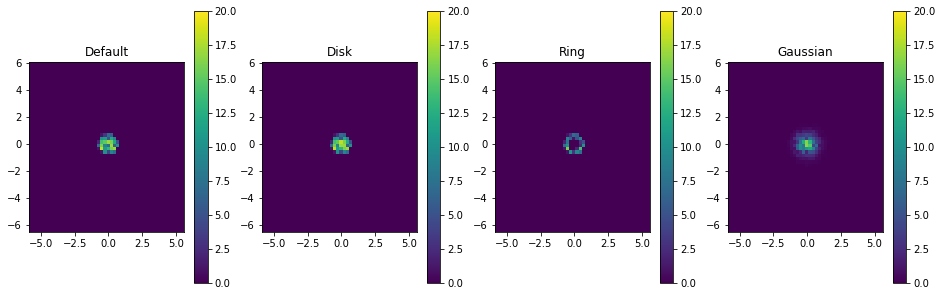

In [6]:
plt.figure(figsize=(16, 5))
plt.subplot(141, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Default')
plt.colorbar();

plt.subplot(142, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_disk.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Disk')
plt.colorbar();

plt.subplot(143, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_ring.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Ring')
plt.colorbar();

plt.subplot(144, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_gauss.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Gaussian')
plt.colorbar();

## Final Weight

In [7]:
binning = [0.01, 0.01547327, 0.023942209, 0.037046426, 0.057322935, 0.088697325, 0.13724377, 0.21236099, 0.32859189, 0.5084391, 0.78672155, 1.2173155, 1.8835851, 2.9145222, 4.5097188, 6.9780098, 10.797263, 16.706896, 25.851032, 40]

src_cutoff = source_object(60*u.min, spectrum_parameters = cutoff_spectrum_parameters) 
src_powerlaw = source_object(tobs=60*u.min, spectrum_parameters = powerlaw_spectrum_parameters)

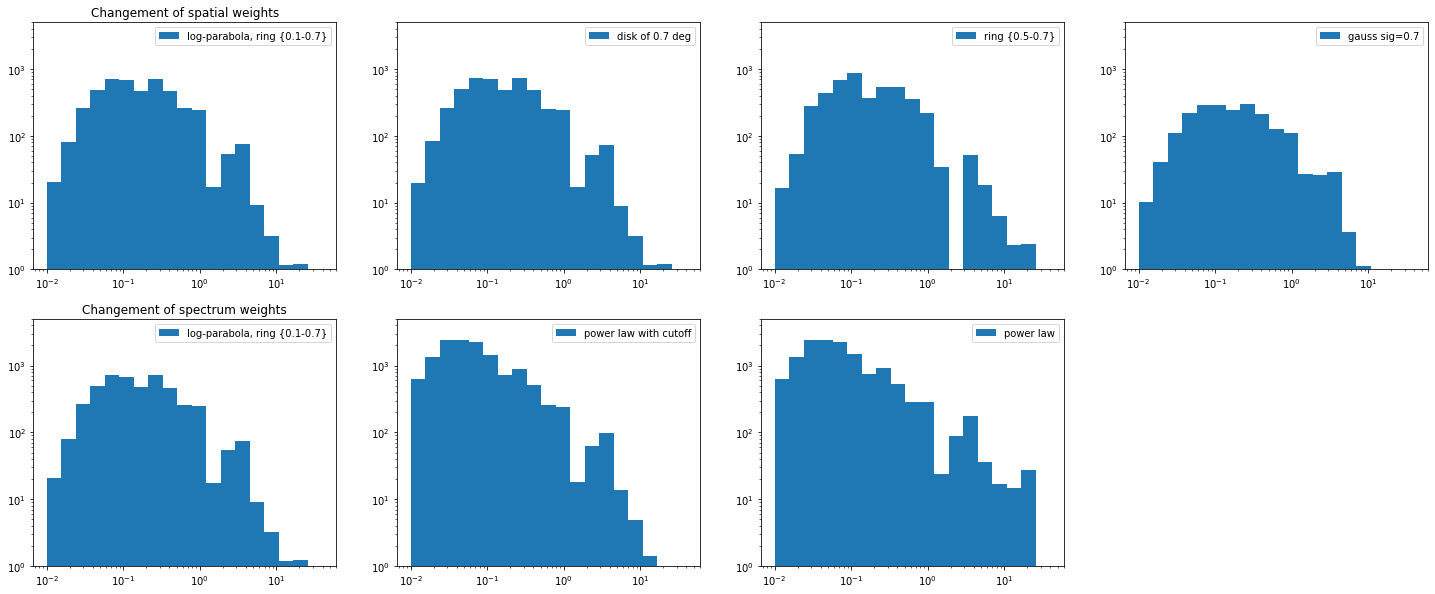

In [13]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins=binning,
    weights= weighting(sim, src),
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins=binning,
    weights= weighting(sim, src_disk),
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins=binning,
    weights= weighting(sim, src_ring),
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins=binning,
    weights= weighting(sim, src_gauss),
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins=binning,
    weights= weighting(sim, src),
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins=binning,
    weights= weighting(sim, src_cutoff),
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins=binning,
    weights= weighting(sim, src_powerlaw),
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();








In [9]:
help(weighting)

Help on function weighting in module aux:

weighting(sim_object, src_object)
    Return the final weight for the histogram of energy of MC data
    
    :param sim_object: simulation data
    :type: simulation_object
    :param src_object: source data
    :type: source_object
    :returns: final weights
    :rtype: list



In [10]:
help(src.spatial_weights)

Help on method spatial_weights in module source:

spatial_weights(cam_x, cam_y) method of source.source_object instance
    Calculate spatial weights
    
    :param cam_x : coordinate x of the camera
    :type: list of float
    :param cam_y : coordinate y of the camera
    :type: list of float
    :returns: weights
    :rtype: list



In [11]:
help(source_object)

Help on class source_object in module source:

class source_object(builtins.object)
 |  source_object(tobs=<Quantity 20. min>, spectrum_parameters={'type': 'log_parabola', 'E_0': <Quantity 1. TeV>, 'norm': <Quantity 3.23e-11 1 / (cm2 s TeV)>, 'index': -2.47, 'curve': -0.24, 'E_cut': 0}, rmax=0.7, rmin=0.1, x0=0, y0=0, offset=0.4, shape='ring')
 |  
 |  A class used to contain parameters of the source object 
 |  
 |  :param tobs : time observation of source data (in second), if 20*u.min uses default
 |  :type tobs: float, optional
 |  :param spectrum_parameters : parameters of the source spectrum (put astropy units), if log parabola function uses default
 |  :type spectrum_parameters: dictionnary, optional
 |  :param rmax : radius max for spatial weights (in deg), if 0.7 uses default
 |  :type rmax: float, optional
 |  :param rmin : radius min for spatial weights (in deg), if 0.1 uses default
 |  :type rmin: float, optional 
 |  :param x0 : coordinate x of the center of the camera, if 